# CNN 모델 시각화 하기
## 1. 학습 된 모델 레이어 아키텍처 시각화 (Plotting model architecture)
<img src="./images/cnn_layer.png" alt="Smiley face" height="600" width="1000"/>
<img src="./images/cnn_layer1.png" alt="Smiley face" height="600" width="1000"/>

In [1]:
from keras.models import load_model
# 'my_model.h5', 'mymnist_cnn.h5'
model_file = 'my_model.h5'
model_org = load_model(model_file)
model_org.summary()

Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)           

## 2. 개별 이미지 전처리

In [2]:
#img_path = 'images/car_parking2.jpg' # Free
img_path = 'images/mnist_test2.png' # Full

from keras.preprocessing import image
import numpy as np 

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)                 
# 이미지를 4D 텐서로 변경, shape = (150, 150, 3) -> (1, 150, 150, 3)
img_tensor = np.expand_dims(img_tensor, axis = 0)    
# 모델이 훈련 될 때 입력에 적용한 이미지 전처리 방식을 동일하게 적용
img_tensor /= 255.
#img_tensor = img_tensor[:,:,:,0:1]

print(img_tensor[0].shape)


(150, 150, 3)


## 3. 테스트 사진 출력하기

원본 이미지


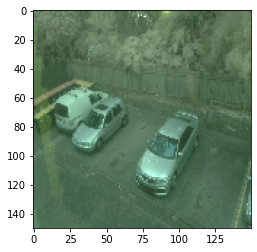

In [3]:
import matplotlib.pyplot as plt 
# 테스트용 이미지 1개 들어가 있음
print('원본 이미지')
plt.imshow(img_tensor[0])

## 4. 입력 텐서와 출력 텐서의 리스트로 모델 인스턴스(activation_model) 만들기

1. conv2d_1 (Conv2D)            (None, 150, 150, 32)      
2. max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)       
3. conv2d_2 (Conv2D)            (None, 75, 75, 64)   
4. max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        
5. conv2d_3 (Conv2D)            (None, 37, 37, 96) 
6. max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)  
7. conv2d_4 (Conv2D)            (None, 18, 18, 96)
8. max_pooling2d_4 (MaxPooling2 (None, 9, 9, 96)   
9. flatten_1 (Flatten)          (None, 7776)           
10. dense_1 (Dense)              (None, 512)      
11. activation_1 (Activation)    (None, 512)         
12. dense_2 (Dense)              (None, 2)             

In [4]:
from keras import models 

layer_outputs = [layer.output for layer in model_org.layers[:]]
activation_model = models.Model(inputs = model_org.input, outputs = layer_outputs)


In [5]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0   

In [6]:
#레이어의 구성 내역 보기
#activation_model.layers[11].get_config()['activation']
#print(activation_model.layers[1].get_weights())
#print(model_org.layers[0].get_weights())
print(activation_model)
activations = activation_model.predict(img_tensor)
activations


          [0.        , 0.        , 0.        , ..., 0.19101523,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.21999797,
           0.        , 0.        ]],
 
         [[0.12701471, 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01636619, 0.        , 0.        , ..., 0.18480696,
           0.        , 0.        ],
          [0.00325228, 0.        , 0.        , ..., 0.19557545,
           0.        , 0.        ],
          ...,
          [0.00976158, 0.        , 0.        , ..., 0.17203197,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.18274023,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.21389428,
           0.        , 0.        ]],
 
         ...,
 
         [[0.12746798, 0.01425271, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.23825338,

In [7]:
model_org.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

## 5. 첫번째 레이어(합성곱층)의 활성화 값

In [8]:
from keras import backend as K

def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    # np.clip(a, a_min, a_max, out=None) : a_min 미만값은 모두 a_min로, a_max 이상값은 모두 a_max로 대체 함. 
    x = np.clip(x, 0, 255).astype('uint8')
    return x
    
def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    # layer_activation = (1, size, size, n_features)
    layer_output = activation_model.get_layer(layer_name).output
    # tf.keras.backend.mean(x, axis=None, keepdims=False) : 지정된 축과 함께 텐서의 평균을 계산합니다
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, activation_model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([activation_model.input], [loss, grads])
    
    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

# 최종 결과를 시각화 하기 위한 바차트 그리기
def draw_barchart(labels, values):
    fig = plt.figure(figsize=(12, len(labels)))
    ax = fig.add_subplot(1, 1, 1)
    dx = values.max() / 50
    ax.barh(labels, values)
    for i, (value, name) in enumerate(zip(values, labels)):
        if value > 0.5:
            ax.text(value-dx, i, f'{value:,.4f}', size=16, weight=600, ha='right',  va='center')
        else:
            ax.text(value+dx, i, f'{value:,.4f}', size=16, weight=600, ha='left',  va='center')
    ax.grid(which='major', axis='x', linestyle='-')
    plt.box(False)

## 6. 컨볼루션 레이어 필터 시각화 해보기

No.1 Layer Name = conv2d_1, Shape = (1, 150, 150, 32)
No.2 Layer Name = max_pooling2d_1, Shape = (1, 75, 75, 32)
No.3 Layer Name = conv2d_2, Shape = (1, 75, 75, 64)
No.4 Layer Name = max_pooling2d_2, Shape = (1, 37, 37, 64)
No.5 Layer Name = conv2d_3, Shape = (1, 37, 37, 96)
No.6 Layer Name = max_pooling2d_3, Shape = (1, 18, 18, 96)
No.7 Layer Name = conv2d_4, Shape = (1, 18, 18, 96)
No.8 Layer Name = max_pooling2d_4, Shape = (1, 9, 9, 96)
No.9 Layer Name = flatten_1, Shape = (1, 7776)
No.10 Layer Name = dense_1, Shape = (1, 512)
No.11 Layer Name = activation_1, Shape = (1, 512)
No.12 Layer Name = dense_2, Shape = (1, 2)
Result :  [0.97087955 0.02912047]


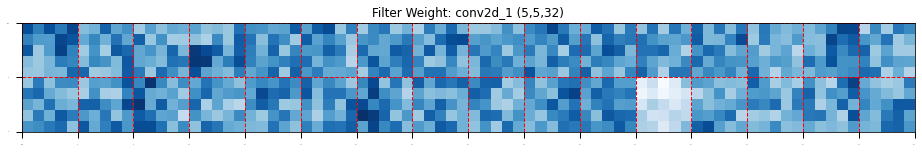

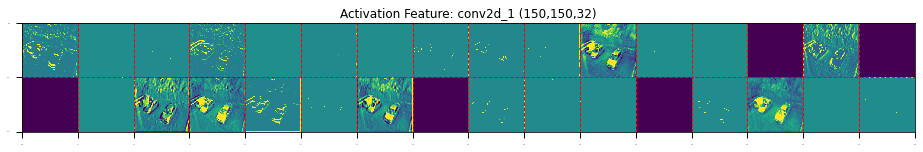

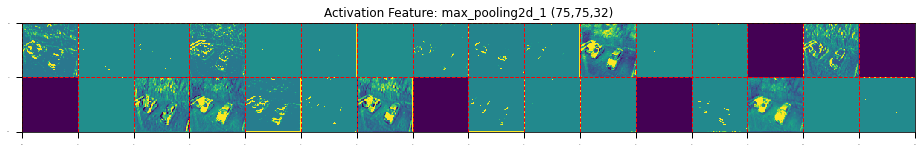

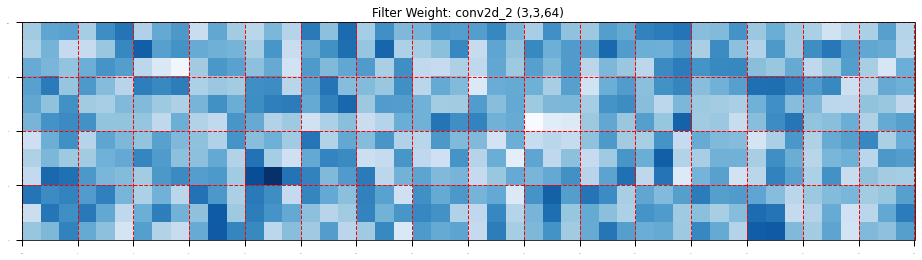

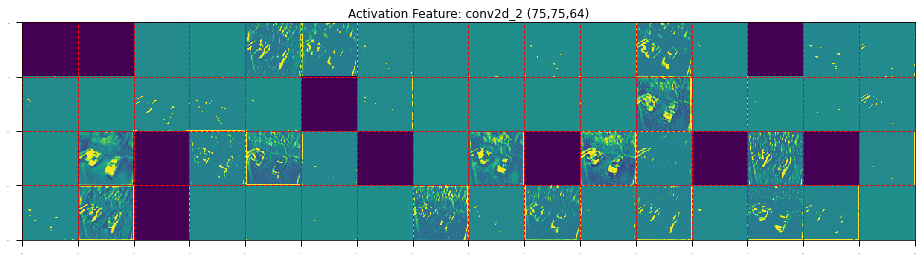

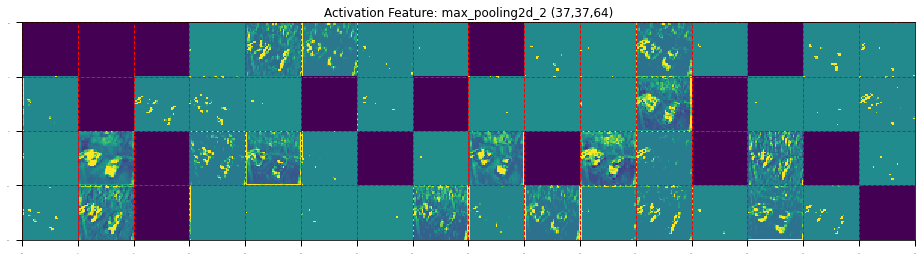

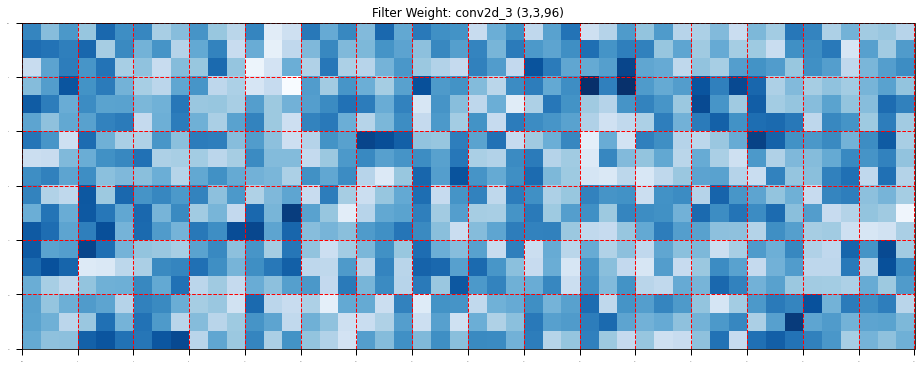

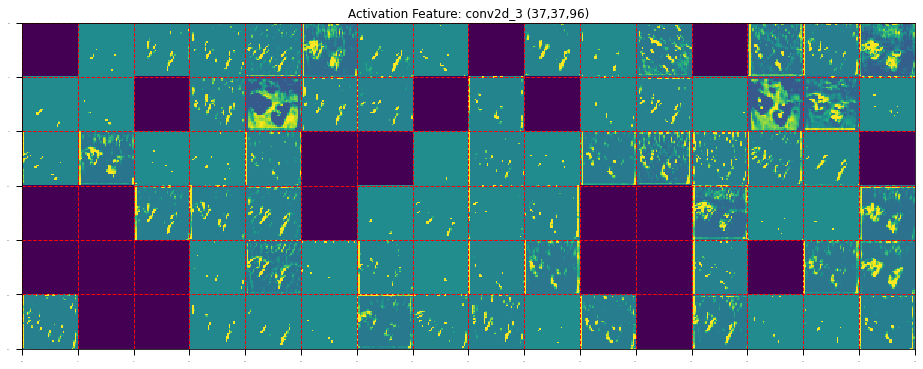

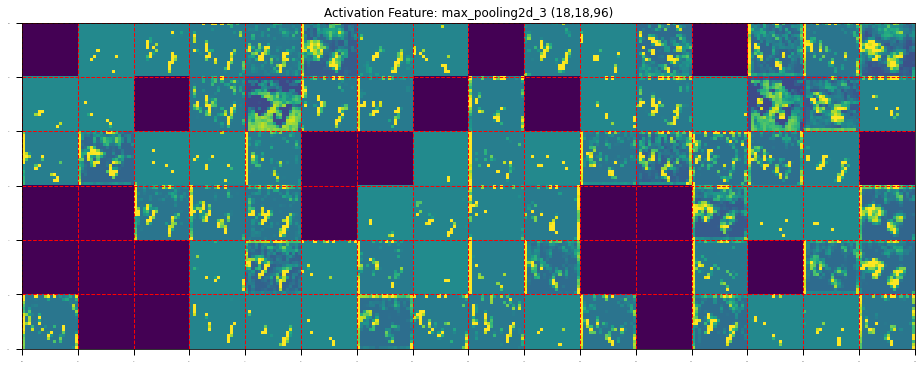

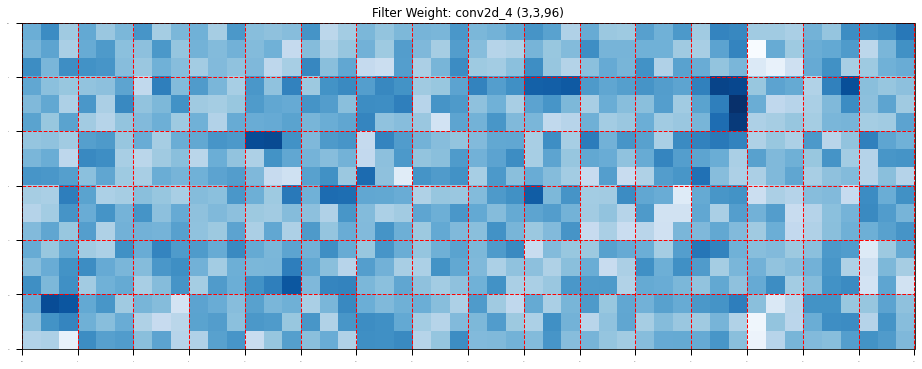

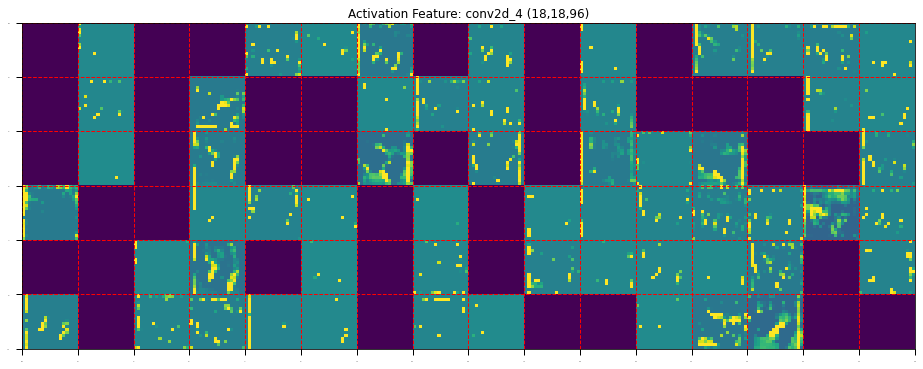

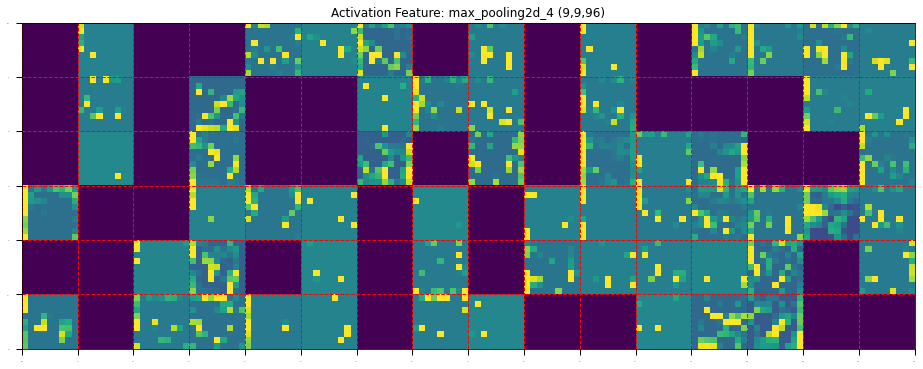

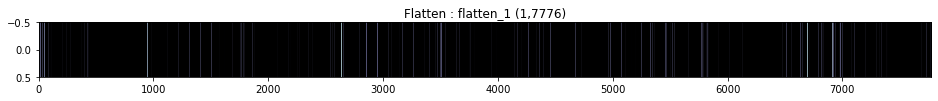

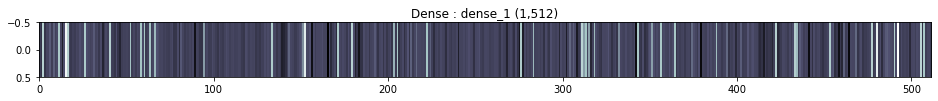

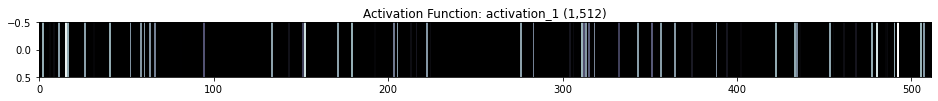

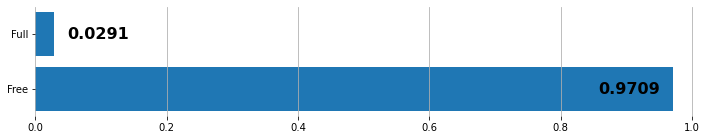

In [13]:
# 모델인스턴스 활성화 (이미지 투입) : 이미지를 입력했을 떄 모델을 지나가는 결과 값들이 나옴.
activations = activation_model.predict(img_tensor)

# 모델내부 레이어명 리스트
layer_names = [layer.name for layer in activation_model.layers[1:]]
layer_count = len(layer_names)
# 최종결과 라벨링
predict_label = ['Free','Full']  
# 시각화 한줄당 이미지셀 수
images_per_row = 16
layer_index = 0
# layer_activation 에는 결과 값들이, layer_model 에는 모델 설계도가 있음. 
for layer_name, layer_activation, layer_model in zip(layer_names, activations, activation_model.layers[1:]):
    layer_index += 1
    # cfg = layer_model.get_config()
    print('No.{0} Layer Name = {1}, Shape = {2}'.format(layer_index, layer_name, layer_activation.shape))
    # continue
    # 최종 결과 시각화
    if layer_index == layer_count:
        print('Result : ', layer_activation[0,: ])
        draw_barchart(predict_label, layer_activation[0,: ])
        continue

    # 최종 판단 레이어(flatten, dense, activation) 시각화, shape = (1, length)
    if 'flatten' in layer_name:
        fig = plt.figure(figsize=(16, 1))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Flatten : {0} ({1},{2})'.format(layer_name, layer_activation.shape[0], layer_activation.shape[1]))
        flatten_image = layer_activation[: ,: ]
        ax.imshow(flatten_image, aspect='auto', interpolation="nearest", cmap='bone')
        continue

    if 'dense' in layer_name:
        fig = plt.figure(figsize=(16, 1))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Dense : {0} ({1},{2})'.format(layer_name, layer_activation.shape[0], layer_activation.shape[1]))
        flatten_image = layer_activation[: ,: ]
        ax.imshow(flatten_image, aspect='auto', interpolation="nearest", cmap='bone')
        continue

    if 'activation' in layer_name:
        fig = plt.figure(figsize=(16, 1))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Activation Function: {0} ({1},{2})'.format(layer_name, layer_activation.shape[0], layer_activation.shape[1]))
        flatten_image = layer_activation[: ,: ]
        ax.imshow(flatten_image, aspect='auto', interpolation="nearest", cmap='bone')
        continue

    # 활성화 채널(맵) 구조 추출 = (1, size, size, n_features)
    n_features = layer_activation.shape[-1]
    size_feature = layer_activation.shape[1]

    # 활성화 채널(맵) 시각화 그리드 크기 계산 및 영역 정의
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size_feature * n_cols, images_per_row * size_feature))
    
    # 컨블루션 레이어(컨브넷 필터) 시각화 하기
    if 'conv' in layer_name:
        # 컨브넷 필터 시각화 - 컨브넷 필터가 찾으려고 하는 시각적인 패턴을 이해
        # get_weights() => [0]-wights(kernel_size.x, kernel_size.y, image.channel, filters) = (5,5,3,32)
        #                  [1]-bias
        filters = layer_model.get_weights()[0]
        filter_cnt = filters.shape[3]
        filter_size = filters.shape[0]
        # 시각화를 위한 가공
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        # 필터를 그리기 위한 그리드 크기 계산 및 영역 정의
        n_filter_cols = filter_cnt // images_per_row
        fdisplay_grid = np.zeros((filter_size * n_filter_cols, images_per_row * filter_size))

        for col in range(n_filter_cols):
                for row in range(images_per_row):
                    # 필터별 이미지 데이터를 분리
                    filter_image = filters[: ,: ,0, col * images_per_row + row ]
                    fdisplay_grid[col * filter_size : (col + 1) * filter_size, row * filter_size : (row + 1) * filter_size] = filter_image

        scale = 1. / filter_size
        fig = plt.figure(figsize=(scale * fdisplay_grid.shape[1], scale * fdisplay_grid.shape[0]))
        ax = fig.add_subplot(1, 1, 1)
        major_ticks_x = np.arange(-0.5, filter_size * images_per_row + 0.5, filter_size)
        major_ticks_y = np.arange(-0.5, filter_size * n_filter_cols + 0.5, filter_size)
        ax.set_xticks(major_ticks_x)
        ax.set_yticks(major_ticks_y)
        ax.set_title('Filter Weight: {0} ({1},{2},{3})'.format(layer_name, filter_size, filter_size, filter_cnt))
        ax.grid(True, color='red', alpha=1.0, linestyle='--', linewidth=1)
        ax.tick_params(axis='both', direction='out', length=6, pad=6, width=1, labelsize=0)
        ax.imshow(fdisplay_grid, aspect='auto', interpolation="nearest", cmap='Blues')
      
        # 필터를 그리기 위한 그리드 크기 계산 및 영역 정의
        # cvf_size = 16
        # cvf_grid = np.zeros((cvf_size * n_filter_cols, images_per_row * cvf_size, 3), dtype='uint8')
        # for col in range(n_filter_cols):
        #         for row in range(images_per_row):
        #             filter_image = generate_pattern(layer_name, col * images_per_row + row, size = cvf_size)
        #             cvf_grid[col * cvf_size : (col + 1) * cvf_size, row * cvf_size : (row + 1) * cvf_size] = filter_image
 
        # scale = 1. / cvf_size
        # fig = plt.figure(figsize=(scale * cvf_grid.shape[1], scale * cvf_grid.shape[0]))
        # ax = fig.add_subplot(1, 1, 1)
        # major_ticks_x = np.arange(-0.5, cvf_size * images_per_row + 0.5, cvf_size)
        # major_ticks_y = np.arange(-0.5, cvf_size * n_filter_cols + 0.5, cvf_size)
        # ax.set_xticks(major_ticks_x)
        # ax.set_yticks(major_ticks_y)
        # ax.set_title('Filter Output')
        # ax.grid(True, color='red', alpha=1.0, linestyle='--', linewidth=1)
        # ax.tick_params(axis='both', direction='out', length=6, pad=6, width=1, labelsize=0)
        # ax.imshow(cvf_grid, aspect='auto', interpolation="nearest", cmap='Blues')
    
    # 활성화(Activation) 맵 시각화 - 입력 이미지 또는 다른 기능 맵과 같은 입력에 필터를 적용한 결과를 시각화'
    for col in range(n_cols):
        for row in range(images_per_row):
            # 활성화 채널(맵) 구조 = (1, size, size, n_features)
            feature_image = layer_activation[0, :, :, col * images_per_row + row]
            # 이미지를 나타내기 좋게 특성을 처리
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')
            display_grid[col * size_feature : (col + 1) * size_feature, row * size_feature : (row + 1) * size_feature] = feature_image
    
    scale = 1. / size_feature
    fig = plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    ax = fig.add_subplot(1, 1, 1)
    major_ticks_x = np.arange(-0.5, size_feature * images_per_row + 0.5, size_feature)
    major_ticks_y = np.arange(-0.5, size_feature * n_cols + 0.5, size_feature)
    ax.set_xticks(major_ticks_x)
    ax.set_yticks(major_ticks_y)    
    ax.set_title('Activation Feature : ' + layer_name)
    ax.set_title('Activation Feature: {0} ({1},{2},{3})'.format(layer_name, size_feature, size_feature, filter_cnt))
    ax.grid(True, color='red', alpha=1.0, linestyle='--', linewidth=1)
    ax.tick_params(axis='both', direction='out', length=6, pad=6, width=1, labelsize=0)
    ax.imshow(display_grid, aspect='auto', interpolation="nearest", cmap='viridis')

plt.show()